In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_scripts():
    df1 = pd.read_csv('../data/simpsons_script_lines.csv', error_bad_lines=False)\
        .sort_values(['episode_id', 'timestamp_in_ms'])\
        .reset_index()
    
    df2 = pd.read_csv('../data/simpsons_episodes.csv', error_bad_lines=False)[['id', 'season']]
    df2.columns = ['episode_id', 'season']

    df3 = pd.merge(df1, df2, how='left', on='episode_id')
    
    return df3


def get_top(df, n_characters):
    # get top characters by line count
    cts = df.raw_character_text.value_counts()
    top = list(cts[:n_characters].index)
    return top


def longest_line(df, character):
    return list(df[np.where(df.raw_character_text==character, True, False)]\
        .sort_values('word_count', ascending=False)['spoken_words'])[0]

In [3]:
df = load_scripts()

b'Skipping line 8084: expected 13 fields, saw 20\nSkipping line 52607: expected 13 fields, saw 21\nSkipping line 59910: expected 13 fields, saw 21\n'
b'Skipping line 71801: expected 13 fields, saw 20\nSkipping line 73539: expected 13 fields, saw 21\nSkipping line 77230: expected 13 fields, saw 21\nSkipping line 78953: expected 13 fields, saw 21\nSkipping line 81138: expected 13 fields, saw 20\nSkipping line 86746: expected 13 fields, saw 22\nSkipping line 101154: expected 13 fields, saw 21\nSkipping line 115438: expected 13 fields, saw 20\nSkipping line 117573: expected 13 fields, saw 22\nSkipping line 130610: expected 13 fields, saw 22\n'
b'Skipping line 152970: expected 13 fields, saw 22\nSkipping line 153017: expected 13 fields, saw 20\nSkipping line 153018: expected 13 fields, saw 30\nSkipping line 154080: expected 13 fields, saw 20\nSkipping line 154082: expected 13 fields, saw 20\nSkipping line 154084: expected 13 fields, saw 20\nSkipping line 154086: expected 13 fields, saw 20\n

In [4]:
print(df.shape)
df.head()

(158248, 15)


,index,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count,season
0,148751,4,1,3,Homer Simpson: There's no time to be careful.,10000,true,2,2.0,Homer Simpson,Car,There's no time to be careful.,theres no time to be careful,6.0,1
1,148752,5,1,4,Homer Simpson: We're late.,10000,true,2,2.0,Homer Simpson,Car,We're late.,were late,2.0,1
2,149014,263,1,262,Homer Simpson: Who's Tiny Tim?,1001000,true,2,19.0,Homer Simpson,PERSONNEL OFFICE,Who's Tiny Tim?,whos tiny tim,3.0,1
3,149015,264,1,263,(Simpson Home: int. simpson house - night),1006000,false,NaN,5.0,NaN,Simpson Home,NaN,NaN,NaN,1
4,149016,265,1,264,"Bubbles: (FROM TV) Hey, Moldy, do you think Sa...",1006000,true,29,5.0,Bubbles,Simpson Home,"Hey, Moldy, do you think Santa will be able to...",hey moldy do you think santa will be able to f...,17.0,1


In [78]:
N = 3000
# get_top(df,N)

In [79]:
def to_int(x):
    try: return int(x)
    except: return None
df.timestamp_in_ms = df.timestamp_in_ms.apply(to_int)
df.dtypes
times = df[np.where(df.raw_character_text.isin(get_top(df,N)), True, False)]\
    .groupby('raw_character_text')\
    .agg({'timestamp_in_ms': ['mean','count']})
times.columns = ['mean','count']
times = times\
    .sort_values(by='mean', ascending=False)\
    .reset_index()

In [211]:
df.timestamp_in_ms = df.timestamp_in_ms.apply(to_int)
df.dtypes
times = df[np.where(df.raw_character_text.isin(get_top(df,N)), True, False)]\
    .groupby('raw_character_text')\
    .agg({'timestamp_in_ms': ['median','count']})
times.columns = ['mean','count']
times = times\
    .sort_values(by='mean', ascending=False)\
    .reset_index()

In [212]:
times

,raw_character_text,mean,count
0,Bowling Clerk,1379000.0,3
1,Adam Clayton,1340000.0,5
2,Lee Carvallo,1335000.0,7
3,Employment Counselor,1315000.0,2
4,Dottie,1315000.0,3
5,Karaoke Operator,1315000.0,3
6,Regulator,1315000.0,2
7,Canadian Official #1,1315000.0,4
8,Los Jacquitos Leader,1315000.0,4
9,Robert Marlowe,1315000.0,18


In [213]:
top = get_top(df, N)
episode_appearances = []
for c in top:
    episode_appearances.append(len(set(df[np.where(df.raw_character_text==c, True, False)].episode_id)))

In [214]:
d = {'raw_character_text' : top, 'n_eps' : episode_appearances}
df_ = pd.DataFrame.from_dict(d)
df_.loc[:,'recurring'] = df_['n_eps'] > 1
df_.head()

,raw_character_text,n_eps,recurring
0,Homer Simpson,564,True
1,Marge Simpson,563,True
2,Bart Simpson,562,True
3,Lisa Simpson,562,True
4,C. Montgomery Burns,241,True


In [215]:
df_for_plot = pd.merge(times, df_, how='left', on='raw_character_text')
print(df_for_plot.shape)
df_for_plot.head()

(3000, 5)


,raw_character_text,mean,count,n_eps,recurring
0,Bowling Clerk,1379000.0,3,1,False
1,Adam Clayton,1340000.0,5,1,False
2,Lee Carvallo,1335000.0,7,1,False
3,Employment Counselor,1315000.0,2,1,False
4,Dottie,1315000.0,3,1,False


In [216]:
r = df_for_plot[np.where(df_for_plot.recurring, True, False)]
nr = df_for_plot[np.where(df_for_plot.recurring, False, True)]

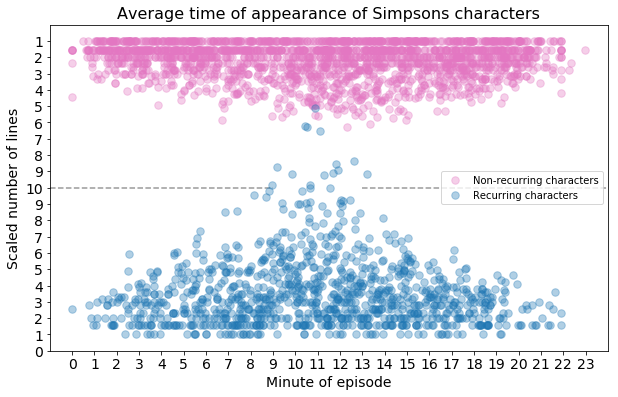

In [237]:
fig = plt.figure(figsize=(10,6))

# plt.xticks(range(0,24,1))
# plt.xlabel('Minute of episode')
# plt.ylabel('Scaled number of lines')
# plt.title('')
# plt.xlim([0,24])
# plt.ylim([0,15])
# plt.show()

# fig = plt.figure(figsize=(10,6))
plt.hlines(y=[10]*2, xmin=[-1,13], xmax=[9,24], linestyle='--', alpha=.4)
plt.plot(nr['mean']/60000, 20-np.log2(nr['count']), '.', alpha=.35, c='tab:pink', markersize=15)
plt.plot(r['mean']/60000, np.log2(r['count']), '.', alpha=.35, c='tab:blue', markersize=15)
plt.xlim([-1,24])
plt.ylim([0,20])
plt.xlabel('Minute of episode', fontsize=14)
plt.ylabel('Scaled number of lines', fontsize=14)
plt.xticks(range(0,24,1), fontsize=14)
plt.yticks(ticks=list(range(20)), labels=list(range(10))+list(range(11))[::-1], fontsize=14)
plt.legend(('Non-recurring characters','Recurring characters'))
plt.title('Average time of appearance of Simpsons characters', fontsize=16)
plt.savefig('./plots/scatter_plot.png', bbox_inches='tight')
plt.show()